In [166]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [167]:
dataset = pd.read_csv("liver_cirrhosis.csv")
dataset

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,D,D-penicillamine,23612,F,N,N,N,N,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,D,D-penicillamine,16736,F,N,Y,Y,Y,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,C,D-penicillamine,16990,F,N,Y,N,N,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


### Insights

In [168]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

### Checking for missing values

In [169]:
pd.DataFrame(dataset.isna().sum()).T.style.background_gradient(cmap='inferno')

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [170]:
dataset.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


# Visualising Data
### Counting various stages of Cirrhosis observered

<Axes: xlabel='Stage', ylabel='count'>

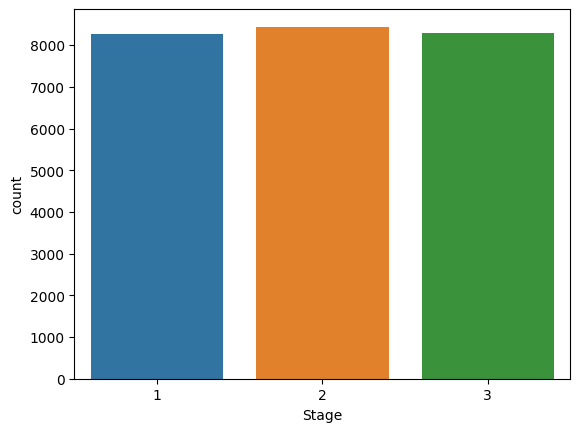

In [171]:
# stages of liver cirrhosis
sns.countplot(x = "Stage", data = dataset )


### KDS plots of continous variables

<Figure size 1000x600 with 0 Axes>

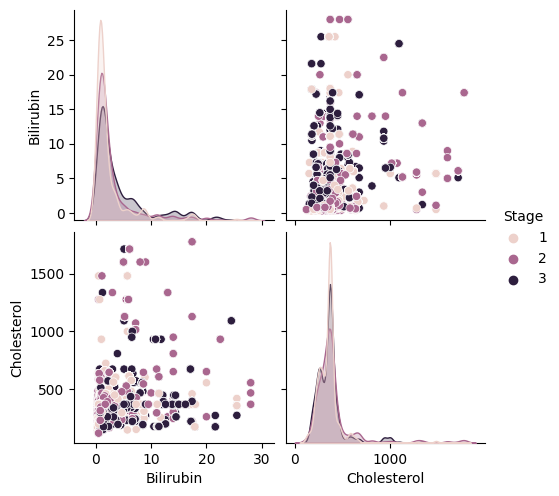

In [172]:
vars = ["Bilirubin","Cholesterol"]
plt.figure(figsize=(10,6))
sns.pairplot(data=dataset, vars=vars, hue="Stage", diag_kind='kde', diag_kws=dict(fill=True, common_norm=False))


<Figure size 1000x600 with 0 Axes>

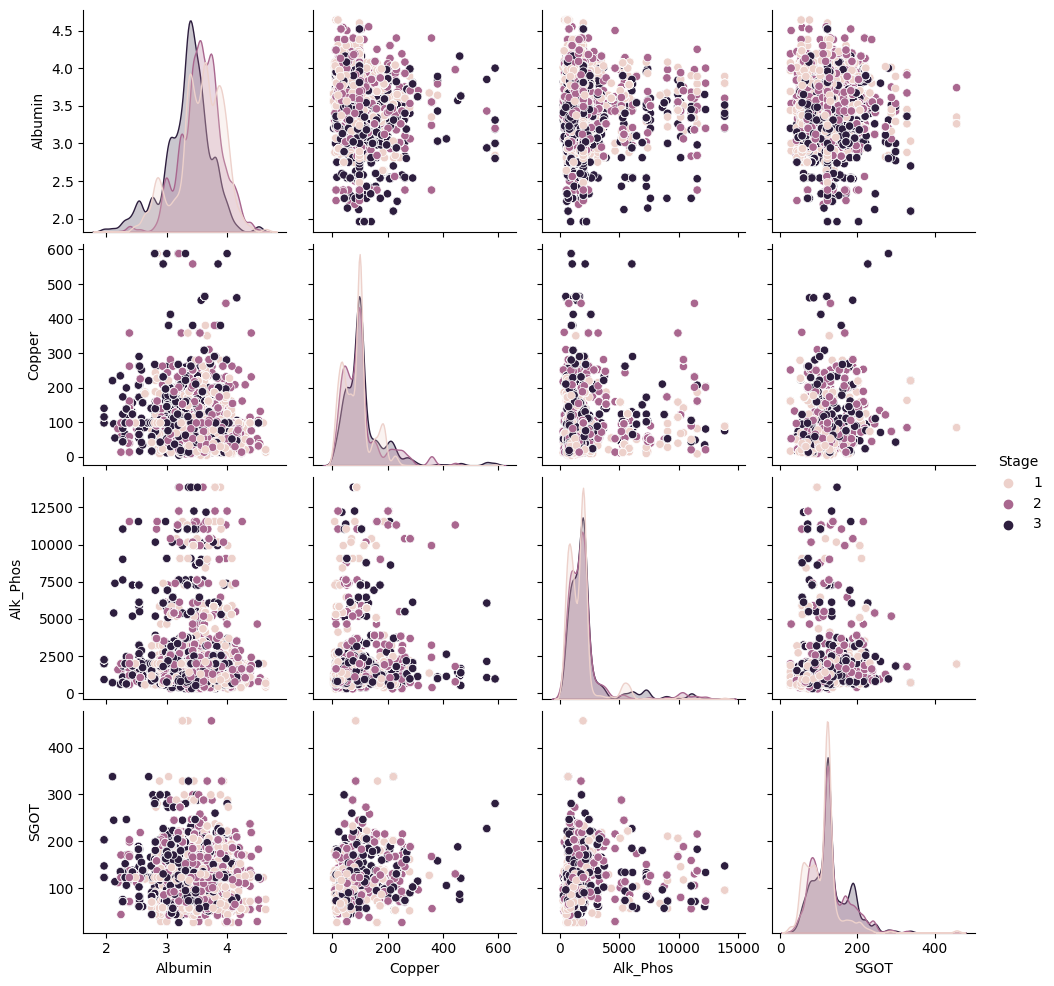

In [173]:
vars_1 = ["Albumin","Copper","Alk_Phos", "SGOT"]
plt.figure(figsize=(10,6))
sns.pairplot(data=dataset, vars=vars_1, hue="Stage", diag_kind='kde', diag_kws=dict(fill=True, common_norm=False))


<Figure size 1000x600 with 0 Axes>

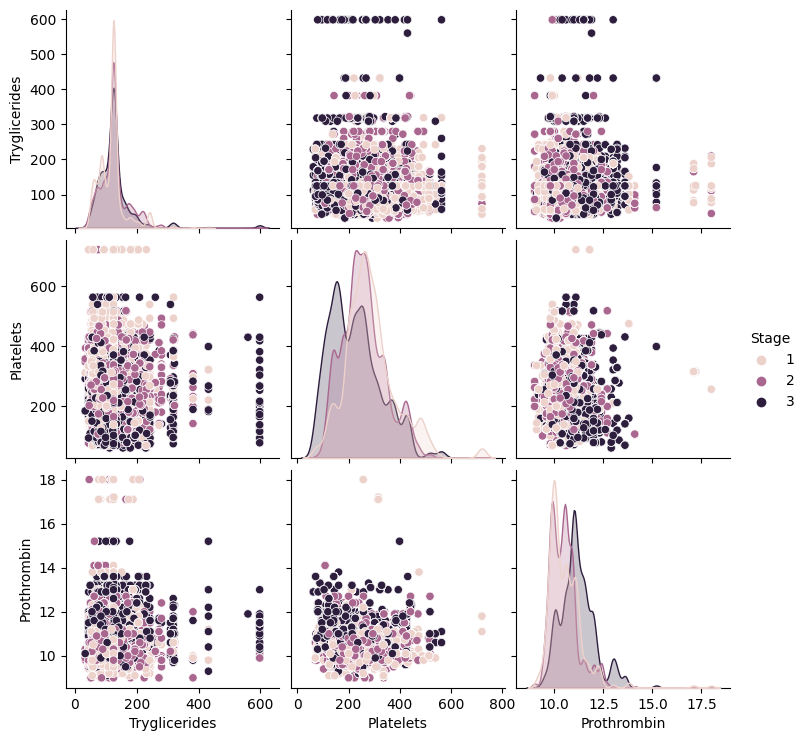

In [174]:
vars_3 = ["Tryglicerides", "Platelets", "Prothrombin"]
plt.figure(figsize=(10,6))
sns.pairplot(data=dataset, vars=vars_3, hue="Stage", diag_kind='kde', diag_kws=dict(fill=True, common_norm=False))


### Countplots for categorical variables

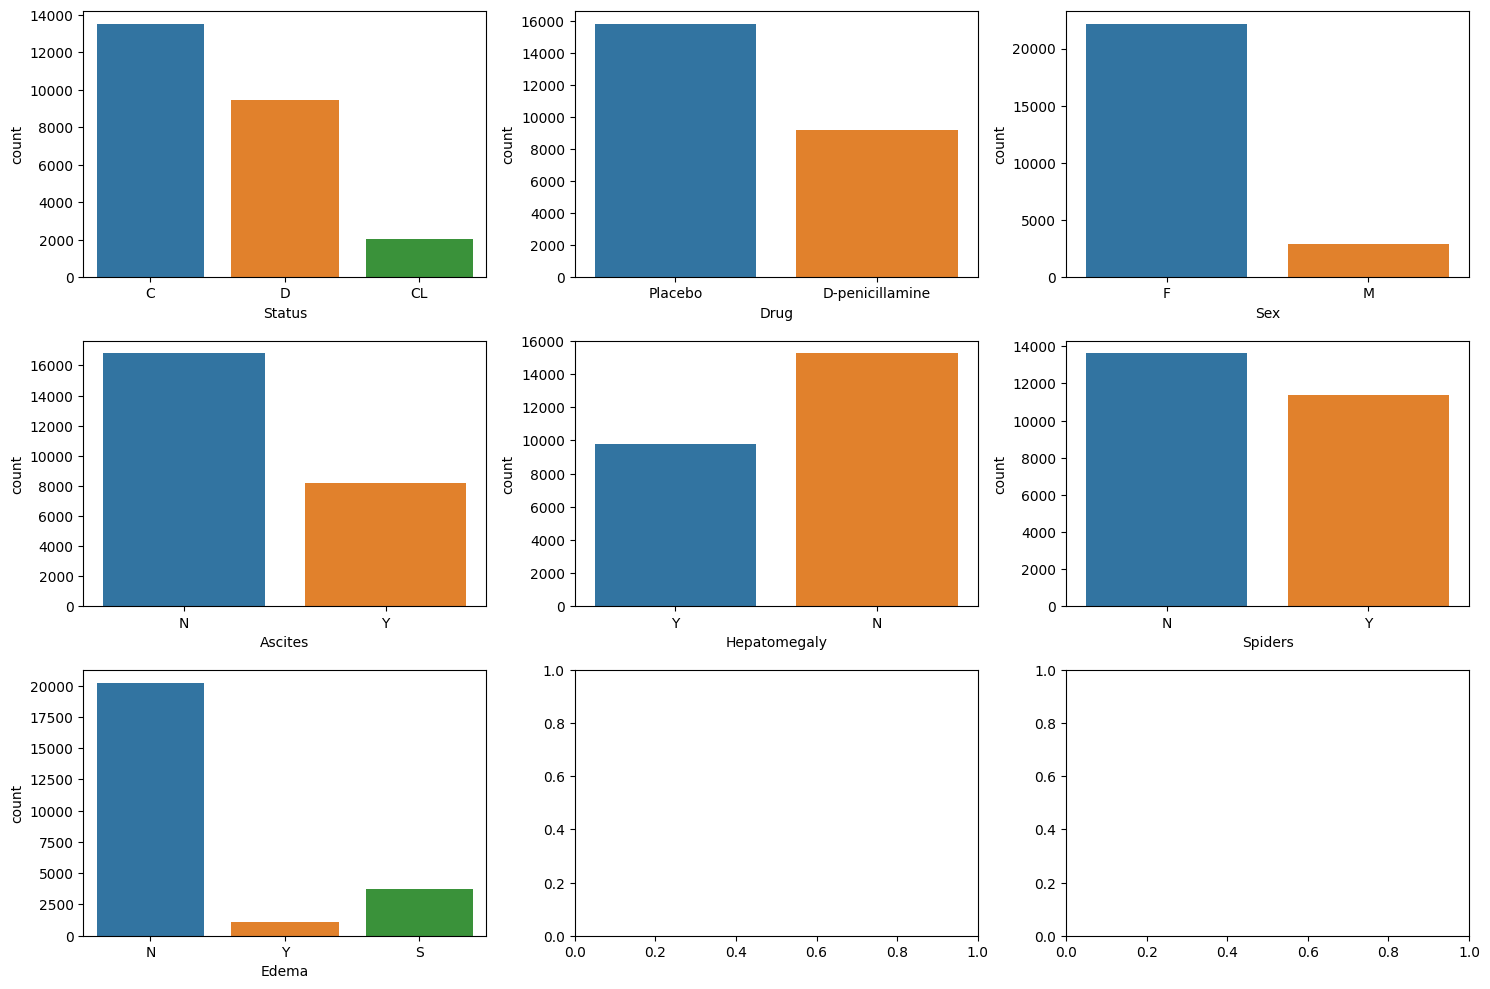

In [175]:
import math
var_4 = ["Status", "Drug", "Sex","Ascites","Hepatomegaly","Spiders","Edema"]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))


axes_flat = axes.flatten()

for i, var in enumerate(var_4):
    sns.countplot(data=dataset, x=var, ax=axes_flat[i])


plt.tight_layout()


plt.show()

### Correlation Matrix

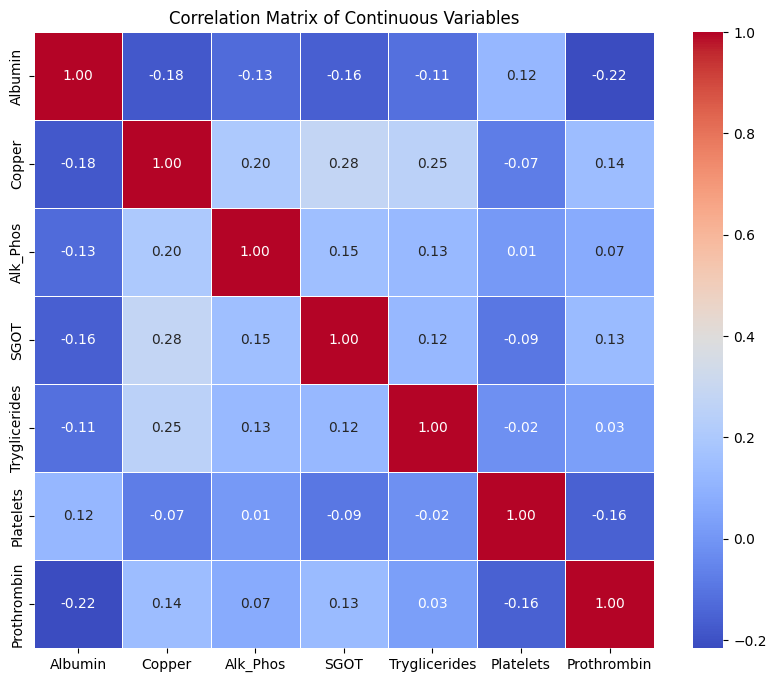

In [176]:
continuous_vars = ["Albumin", "Copper", "Alk_Phos", "SGOT", "Tryglicerides", "Platelets", "Prothrombin"]
corr_matrix = dataset[continuous_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

### Pre Processing

In [177]:
from sklearn.preprocessing import LabelEncoder

for col in dataset.select_dtypes(object):
    dataset[col] = LabelEncoder().fit_transform(dataset[col])
dataset

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,0,1,18499,0,0,1,0,0,0.5,149.000000,4.04,227.0,598.0,52.70,57.000000,256.0,9.9,1
1,1230,0,1,19724,1,1,0,1,0,0.5,219.000000,3.93,22.0,663.0,45.00,75.000000,220.0,10.8,2
2,4184,0,1,11839,0,0,0,0,0,0.5,320.000000,3.54,51.0,1243.0,122.45,80.000000,225.0,10.0,2
3,2090,2,1,16467,0,0,0,0,0,0.7,255.000000,3.74,23.0,1024.0,77.50,58.000000,151.0,10.2,2
4,2105,2,1,21699,0,0,1,0,0,1.9,486.000000,3.54,74.0,1052.0,108.50,109.000000,151.0,11.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3584,2,0,23612,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24996,3584,2,0,23612,0,0,0,0,0,0.8,231.000000,3.87,173.0,9009.8,127.71,96.000000,295.0,11.0,2
24997,971,2,0,16736,0,0,1,1,2,5.1,369.510563,3.23,18.0,790.0,179.80,124.702128,104.0,13.0,3
24998,3707,0,0,16990,0,0,1,0,0,0.8,315.000000,4.24,13.0,1637.0,170.50,70.000000,426.0,10.9,2


In [178]:
from sklearn.model_selection import train_test_split

x = dataset.iloc[:,:-1]  
y = dataset.iloc[:, -1]  


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17500, 18), (17500,), (7500, 18), (7500,))

In [179]:
from sklearn.preprocessing import MinMaxScaler
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

### Building Logistic Regression Model


In [180]:
import torch.nn as nn
import torch.optim as optim

x_train_tensor = torch.tensor(x_train, dtype= torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
y_train_tensor = y_train_tensor.view(-1)
y_train_tensor -= 1
y_train_tensor

tensor([0., 1., 2.,  ..., 2., 0., 0.])

In [181]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

In [182]:
model = LogisticRegression(input_size=x_train_tensor.shape[1], num_classes=3)  # Assuming 3 classes
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.2)

In [184]:
num_epochs = 10000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_train_tensor)
    loss = loss_fn(outputs, y_train_tensor.long()) 
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/10000], Loss: 1.0474
Epoch [20/10000], Loss: 1.0215
Epoch [30/10000], Loss: 1.0032
Epoch [40/10000], Loss: 0.9895
Epoch [50/10000], Loss: 0.9790
Epoch [60/10000], Loss: 0.9708
Epoch [70/10000], Loss: 0.9642
Epoch [80/10000], Loss: 0.9587
Epoch [90/10000], Loss: 0.9542
Epoch [100/10000], Loss: 0.9503
Epoch [110/10000], Loss: 0.9470
Epoch [120/10000], Loss: 0.9441
Epoch [130/10000], Loss: 0.9415
Epoch [140/10000], Loss: 0.9392
Epoch [150/10000], Loss: 0.9372
Epoch [160/10000], Loss: 0.9353
Epoch [170/10000], Loss: 0.9336
Epoch [180/10000], Loss: 0.9320
Epoch [190/10000], Loss: 0.9306
Epoch [200/10000], Loss: 0.9292
Epoch [210/10000], Loss: 0.9280
Epoch [220/10000], Loss: 0.9268
Epoch [230/10000], Loss: 0.9256
Epoch [240/10000], Loss: 0.9246
Epoch [250/10000], Loss: 0.9236
Epoch [260/10000], Loss: 0.9226
Epoch [270/10000], Loss: 0.9217
Epoch [280/10000], Loss: 0.9208
Epoch [290/10000], Loss: 0.9200
Epoch [300/10000], Loss: 0.9192
Epoch [310/10000], Loss: 0.9184
Epoch [320/10000]

In [185]:
y_test_array = y_test.values
y_test_tensor = torch.tensor(y_test_array, dtype=torch.float32)
y_test_tensor = y_test_tensor.view(-1)
y_test_tensor -= 1
y_test_tensor
x_test_tensor = torch.tensor(x_test,dtype= torch.float32)

In [187]:
model.eval()  
with torch.no_grad():  
    outputs = model(x_test_tensor)  
    _, predicted = torch.max(outputs, 1)  


correct = (predicted == y_test_tensor).sum().item()  
total = y_test_tensor.size(0) 
accuracy = correct / total
print(f'Test Accuracy: {accuracy:.2f}')


Test Accuracy: 0.58


### Random Forest